# PRÁCTICA 0 - ADRIÁN TURIEL CHARRO - VÍCTOR CHOZA MERINO

## 1. Regresión lineal con una variable

In [11]:
import time
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import statistics as st

In [13]:
def descenso_gradiente(X, Y, alpha, iters):
    m = np.shape(X)[0]     #Filas: 47 
    n = np.shape(X)[1]     #Columnas: 2
    Theta = np.zeros(n)

    for _ in range(iters):
        H = np.dot(X, Theta)   #Hipótesis

        Aux = (H - Y)

        for i in range(n):   
            Aux_i = Aux * X[:,i]
            Theta[i] -= (alpha / m) * Aux_i.sum() 
    
    return Theta

In [14]:
def grafica(Theta0, Theta1, X, Y):
    X = X[:,1:np.shape(X)[1]]  # Todas las columnas menos la de unos
    plt.plot(X, Y, "x")
    fun_x_1 = np.min(X)
    fun_x_2 = np.max(Y)
    fun_y_1 = Theta0 + Theta1 * fun_x_1
    fun_y_2 = Theta0 + Theta1 * fun_x_2
    plt.plot([fun_x_1, fun_x_2], [fun_y_1, fun_y_2])
    plt.show()

In [15]:
def coste (X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [16]:
def make_data(t0_range, t1_range, X, Y):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty(Theta0.shape)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [17]:
def grafica_coste(t0_range, t1_range, X, Y):
    Theta0, Theta1, Coste = make_data(t0_range, t1_range, X, Y)
    plt.contour(Theta0, Theta1, Coste, np.logspace(-2, 3, 20))
    plt.show()

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(Theta0, Theta1, Coste, cmap='rainbow',
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [18]:
def regresion_lineal(datos, alpha, iters):
    valores = read_csv(datos, header=None).to_numpy()

    X = valores[:,:-1]
    Y = valores[:,-1]
    
    #Añadimos una columna de 1's a la X             
    X = np.hstack([np.ones([len(X), 1]), X])

    Theta = descenso_gradiente(X, Y, alpha, iters)
    
    grafica(Theta[0], Theta[1], X, Y)

    grafica_coste([-10, 10], [-1, 4], X, Y)

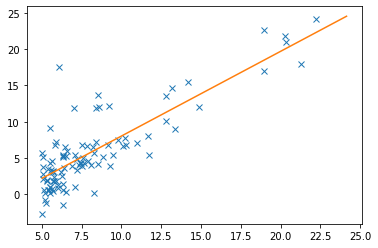

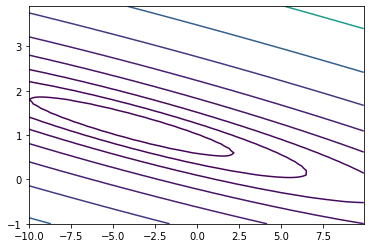

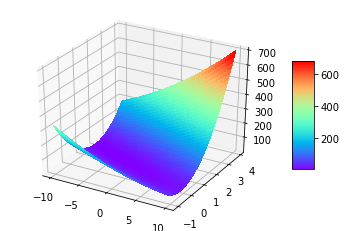

In [19]:
regresion_lineal("ex1data1.csv", 0.01, 1500)

## 1. Regresión lineal con múltiples variables

In [10]:
def coste_multiple(X, Y, Theta):
    H = np.dot(X, Theta) #multiplicacion
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [11]:
def hipotesis_multiple(Theta, X):
    return np.dot(X, Theta)

In [12]:
def ecuacion_normal_multiple(X, Y): 
    Aux1 = np.dot(np.transpose(X),X)
    Aux1 = np.linalg.pinv(Aux1)
    Aux2 = np.dot(np.transpose(X),Y)
    Thetas = np.dot(Aux1,Aux2)
    return Thetas                      # Theta = ((X.T * X)^-1)*X.T*Y

In [13]:
def normalizar_matriz(X): 
    mus = np.mean(X, axis=0)   #Medias de cada columna
    sigmas = np.std(X, axis=0) #Desviaciones de cada columna

    return mus, sigmas, (X-mus)/sigmas

In [14]:
def descenso_gradiente_multiple(X, Y, Theta, alpha): 
    NuevaTheta = Theta
    m = np.shape(X)[0]     #Filas: 47 
    n = np.shape(X)[1]     #Columnas: 3
    H = hipotesis_multiple(Theta, X)   #Hipótesis

    Aux = (H - Y)

    for i in range(n):   
        Aux_i = Aux * X[:,i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum() 

    return NuevaTheta

In [15]:
def regresion_lineal_multiple(datos, alpha, max_iters):
    valores = read_csv(datos, header=None).to_numpy().astype(float)
    
    X = valores[:, :-1]  # (47, 2)
    Y = valores[:, -1]   # (47,)

    m = np.shape(X)[0]   #Filas: 47 
    n = np.shape(X)[1]   #Columnas: 2

    #Ecuación normal          
    X_normal = np.hstack([np.ones([m, 1]), X])
    Thetas_norm = ecuacion_normal_multiple(X_normal, Y)
    print('Thetas Ecuación Normal:', Thetas_norm)
    print('Precio para 1650 pies cuadrados y 3 habitaciones', hipotesis_multiple(Thetas_norm, [1,1650,3]))
    print()
    
    #Normalizamos los valores
    mus, sigmas, X = normalizar_matriz(X)       

    #Añadimos una columna de 1's a la X             
    X = np.hstack([np.ones([m, 1]), X]) 

    
    for i in range(len(alpha)):

        Thetas = np.zeros(n+1)    #Thetas calculadas
        Costes = []               #Costes calculados

        for j in range(max_iters):
            Thetas = descenso_gradiente_multiple(X, Y, Thetas, alpha[i])  # el 0 es inventado
            Costes.append(coste_multiple(X, Y, Thetas))

        
            if j == max_iters-1:
                print('INSUFICIENTE: No converge dentro de las iteraciones indicadas:', max_iters)
                print('Thetas:', Thetas)
                print('Alpha:', alpha[i])
                print()
                break

            if Costes[j] > Costes[j-1] and j > 1:
                print('ERROR: Alpha demasiado grande, el coste ha dejado de decrecer sin encontrar convergencia')
                print('Thetas:', Thetas)
                print('Alpha:', alpha[i])
                print('Número de iteraciones:', j)
                print()
                break

            if (Costes[j-1]-Costes[j]) < 0.001 and j > 1:
                print('CORRECTO: Se ha obtenido convergencia')
                print('Thetas:', Thetas)
                print('Alpha:', alpha[i])
                print('Número de iteraciones:', j)
                print('Precio para 1650 pies cuadrados y 3 habitaciones',
                      hipotesis_multiple(Thetas, [1,(1650-mus[0])/sigmas[0],(3-mus[1])/sigmas[1]]))
                print()
                plt.plot(Costes)
                plt.show()
                break

In [16]:
vector_alphas = [0.0003, 0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]

Thetas Ecuación Normal: [89597.90954361   139.21067402 -8738.01911255]
Precio para 1650 pies cuadrados y 3 habitaciones 293081.46433498873

INSUFICIENTE: No converge dentro de las iteraciones indicadas: 25000
Thetas: [340224.59438782 107308.65716665  -4440.06660775]
Alpha: 0.0003

INSUFICIENTE: No converge dentro de las iteraciones indicadas: 25000
Thetas: [312473.37974288  89098.06596749  11689.56421206]
Alpha: 0.0001

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65955964 109446.19081351  -6576.74919803]
Alpha: 0.001
Número de iteraciones: 23844
Precio para 1650 pies cuadrados y 3 habitaciones 293081.8174849252



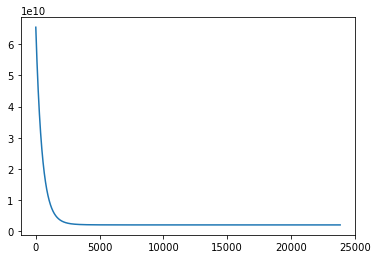

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957028 109446.86984852  -6577.42823304]
Alpha: 0.003
Número de iteraciones: 8360
Precio para 1650 pies cuadrados y 3 habitaciones 293081.66814147786



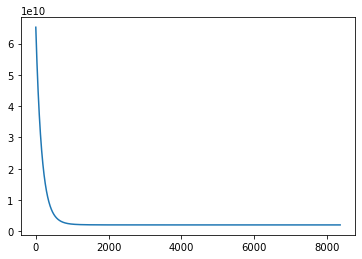

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957347 109447.2913179   -6577.84970242]
Alpha: 0.01
Número de iteraciones: 2641
Precio para 1650 pies cuadrados y 3 habitaciones 293081.5754422707



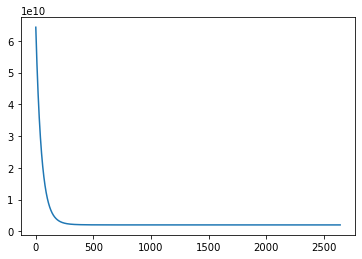

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957423 109447.50826009  -6578.06664461]
Alpha: 0.03
Número de iteraciones: 918
Precio para 1650 pies cuadrados y 3 habitaciones 293081.52772649174



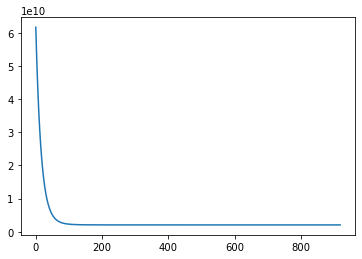

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957444 109447.64717061  -6578.20555513]
Alpha: 0.1
Número de iteraciones: 285
Precio para 1650 pies cuadrados y 3 habitaciones 293081.4971732633



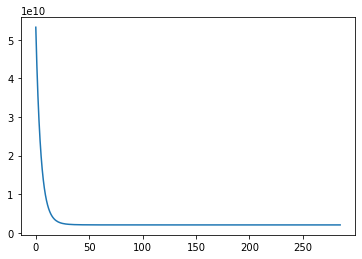

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957447 109447.72386792  -6578.28225244]
Alpha: 0.3
Número de iteraciones: 95
Precio para 1650 pies cuadrados y 3 habitaciones 293081.4803036804



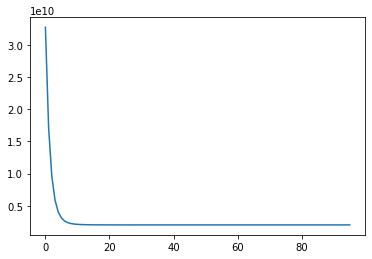

CORRECTO: Se ha obtenido convergencia
Thetas: [340412.65957447 109447.76546445  -6578.3529906 ]
Alpha: 1
Número de iteraciones: 25
Precio para 1650 pies cuadrados y 3 habitaciones 293081.4777432318



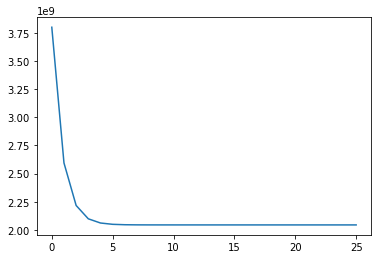

In [17]:
regresion_lineal_multiple("ex1data2.csv", vector_alphas, 25000)